# Real Estate Investing
---
Student name: T.J. Kyner \
Student pace: Full time \
Instructor: Abhineet Kulkarni \
Cohort: 040521

# Project Overview
---
## Data Source
Zillow, one of the top real estate listing platforms in the United States, provides access to a variety of data through its research portal and associated APIs. The data used in this project (`zillow_data.csv`) is sourced from the [research portal](https://www.zillow.com/research/data/) and includes the monthly median home prices of all homes (inclusive of single-family homes, condominiums, and co-operatives homes) per zip code. 

## Business Problem
The goal of this project is to act as a consultant to a fictional real estate invement firm and provide an answer to the following question:
> What are the top five best zip codes for us to invest in?

# Imports & Settings
---

In [1]:
# Standard imports
import numpy as np
import pandas as pd

# Visualization
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
sns.set_theme()

# Data Preprocessing
---
## Previewing and Summary Info

In [3]:
df = pd.read_csv('zillow_data.csv')
df.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,84654,60657,Chicago,IL,Chicago,Cook,1,334200.0,335400.0,336500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,90668,75070,McKinney,TX,Dallas-Fort Worth,Collin,2,235700.0,236900.0,236700.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,91982,77494,Katy,TX,Houston,Harris,3,210400.0,212200.0,212200.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,84616,60614,Chicago,IL,Chicago,Cook,4,498100.0,500900.0,503100.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,93144,79936,El Paso,TX,El Paso,El Paso,5,77300.0,77300.0,77300.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Columns: 272 entries, RegionID to 2018-04
dtypes: float64(219), int64(49), object(4)
memory usage: 30.6+ MB


Looking at just the non-date columns:

In [5]:
df[df.columns[:7]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14723 entries, 0 to 14722
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   RegionID    14723 non-null  int64 
 1   RegionName  14723 non-null  int64 
 2   City        14723 non-null  object
 3   State       14723 non-null  object
 4   Metro       13680 non-null  object
 5   CountyName  14723 non-null  object
 6   SizeRank    14723 non-null  int64 
dtypes: int64(3), object(4)
memory usage: 805.3+ KB


Checking the number of unique cities, states, etc. included in the data:

In [6]:
df[df.columns[:7]].nunique()

RegionID      14723
RegionName    14723
City           7554
State            51
Metro           701
CountyName     1212
SizeRank      14723
dtype: int64

## Column Modifications
The `RegionID` and `SizeRank` columns do not contain useful information for the purposes of this project and will be dropped. 

In [7]:
df.drop(columns=['RegionID', 'SizeRank'], inplace=True)

In [8]:
df.head()

,RegionName,City,State,Metro,CountyName,1996-04,1996-05,1996-06,1996-07,1996-08,...,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04
0,60657,Chicago,IL,Chicago,Cook,334200.0,335400.0,336500.0,337600.0,338500.0,...,1005500,1007500,1007800,1009600,1013300,1018700,1024400,1030700,1033800,1030600
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,235700.0,236900.0,236700.0,235400.0,233300.0,...,308000,310000,312500,314100,315000,316600,318100,319600,321100,321800
2,77494,Katy,TX,Houston,Harris,210400.0,212200.0,212200.0,210700.0,208300.0,...,321000,320600,320200,320400,320800,321200,321200,323000,326900,329900
3,60614,Chicago,IL,Chicago,Cook,498100.0,500900.0,503100.0,504600.0,505500.0,...,1289800,1287700,1287400,1291500,1296600,1299000,1302700,1306400,1308500,1307000
4,79936,El Paso,TX,El Paso,El Paso,77300.0,77300.0,77300.0,77300.0,77400.0,...,119100,119400,120000,120300,120300,120300,120300,120500,121000,121500


Additionally, I'll rename the `RegionName` column to `ZipCode` for easier interpretation. 

In [9]:
df.rename(columns={'RegionName': 'ZipCode'}, inplace=True)

In [10]:
df.columns[:5]

Index(['ZipCode', 'City', 'State', 'Metro', 'CountyName'], dtype='object')

## Missing Data

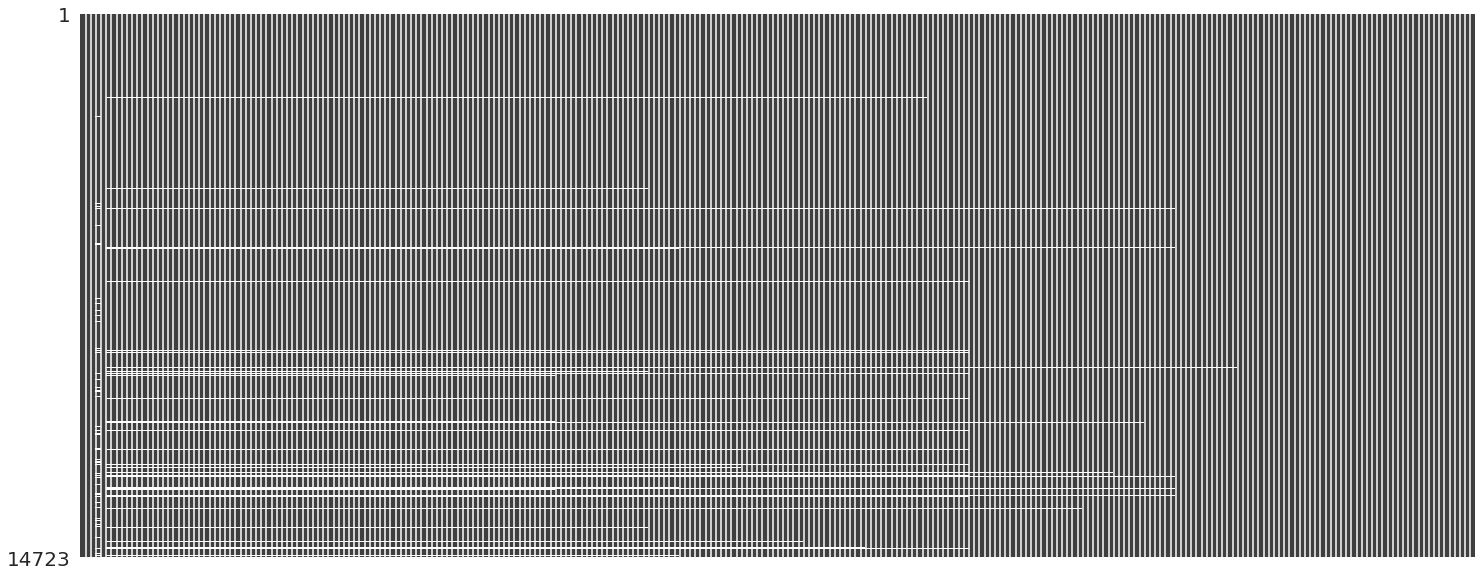

In [11]:
msno.matrix(df, sparkline=False);

In [12]:
# Looking only at the non-date columns
df[df.columns[:5]].isna().sum()

ZipCode          0
City             0
State            0
Metro         1043
CountyName       0
dtype: int64

**Observations:**
- The `Metro` column is the only categorical feature with missing data. Given that certain cities do not reside within a greater metropolitan area, this is not too concerning.
- The horizontal white lines in the matrix show that certain zip codes are missing a sizable chunk of values for specific date ranges. This is also not cause for concern since the missing data appears to be for consecutive dates for each zip code impacted. This is likely due to one of two reasons: 
    1. the zip codes did not exist before the date of the first instance of data or 
    2. the data was not tracked for those zip codes until a certain date.

## Melting the Data
While the data as it is currently organized (wide format) is useful for reading purposes, transforming it to long format is much more conducive for visualization and modeling purposes. This transformation is known as "melting" the data.

In [13]:
def melt_data(df):
    '''Transforms the dataframe from wide format to long format.'''
    melted = pd.melt(df, id_vars=['ZipCode', 'City', 'State', 'Metro', 'CountyName'], var_name='time')
    melted['time'] = pd.to_datetime(melted['time'], infer_datetime_format=True)
    melted = melted.dropna(subset=['value'])
    return melted

df_melted = melt_data(df)
df_melted.head()

,ZipCode,City,State,Metro,CountyName,time,value
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.0
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.0
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.0
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0


In [14]:
df_melted.shape

(3744704, 7)

## Adding FIPS Codes
Federal Information Processing System (FIPS) Codes are standardized codes representing unique states and counties within the United States. As [defined](https://transition.fcc.gov/oet/info/maps/census/fips/fips.txt) by the Federal Communications Commission,

> FIPS codes are numbers which uniquely identify geographic areas.  The number of digits in FIPS codes vary depending on the level of geography.  State-level FIPS codes have two digits, county-level FIPS codes have five digits of which the first two are the FIPS code of the state to which the county belongs.

Including this information in the dataframe will be useful for visualization purposes within the Exploratory Data Analysis section. To do so, I have downloaded [county-level FIPS Codes](https://www.nrcs.usda.gov/wps/portal/nrcs/detail/national/home/?cid=nrcs143_013697) from the Natural Resources Conservation Service of the US Department of Agriculture and will be merging the data with `df_melted` for a final dataframe to work with.

In [15]:
# Explicitly setting the FIPS column dtype to `str` to preserve the leading zeroes
fips = pd.read_csv('fips_county_level.csv', dtype={'FIPS': str})
fips.head()

,FIPS,Name,State
0,01001,Autauga,AL
1,01003,Baldwin,AL
2,01005,Barbour,AL
3,01007,Bibb,AL
4,01009,Blount,AL


In [16]:
df_final = pd.merge(left=df_melted, 
                    right=fips,
                    how='left',
                    left_on=['CountyName', 'State'], 
                    right_on=['Name', 'State'])

df_final.head()

,ZipCode,City,State,Metro,CountyName,time,value,FIPS,Name
0,60657,Chicago,IL,Chicago,Cook,1996-04-01,334200.0,17031,Cook
1,75070,McKinney,TX,Dallas-Fort Worth,Collin,1996-04-01,235700.0,48085,Collin
2,77494,Katy,TX,Houston,Harris,1996-04-01,210400.0,48201,Harris
3,60614,Chicago,IL,Chicago,Cook,1996-04-01,498100.0,17031,Cook
4,79936,El Paso,TX,El Paso,El Paso,1996-04-01,77300.0,48141,El Paso


Quick check to ensure everything merged correctly:

In [17]:
df_final.isna().sum()

ZipCode            0
City               0
State              0
Metro         236023
CountyName         0
time               0
value              0
FIPS               0
Name               0
dtype: int64

Dropping the redundant `Name` column that was added automatically during the merge process:

In [18]:
df_final.drop(columns='Name', inplace=True)
df_final.columns

Index(['ZipCode', 'City', 'State', 'Metro', 'CountyName', 'time', 'value',
       'FIPS'],
      dtype='object')

Rearranging the columns for readability purposes:

In [21]:
df_final = df_final[['ZipCode', 'City', 'Metro', 'CountyName', 'State', 'FIPS', 'time', 'value']]
df_final.head()

,ZipCode,City,Metro,CountyName,State,FIPS,time,value
0,60657,Chicago,Chicago,Cook,IL,17031,1996-04-01,334200.0
1,75070,McKinney,Dallas-Fort Worth,Collin,TX,48085,1996-04-01,235700.0
2,77494,Katy,Houston,Harris,TX,48201,1996-04-01,210400.0
3,60614,Chicago,Chicago,Cook,IL,17031,1996-04-01,498100.0
4,79936,El Paso,El Paso,El Paso,TX,48141,1996-04-01,77300.0


# Exploratory Data Analysis
---

# Modeling
---

# Conclusion
---
## Results

## Next Steps